In [19]:
from SimpleCV import *
from ipywidgets import widgets
from IPython.display import display
import pandas as pd


# Selecting an image with a dropdown

RHJvcGRvd24oZGVzY3JpcHRpb249dSdGaWxlOicsIG9wdGlvbnM9KCcuLi8uLi9kYXRhc2V0LWltYWdlcy83NTk5LnBuZycsICcuLi8uLi9kYXRhc2V0LWltYWdlcy83NjIwLnBuZycsICcuLi/igKY=


Button(description=u'Run', style=ButtonStyle())

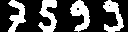

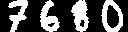

In [20]:
# Display for showing images
disp = Display(displaytype='notebook')

# Find all png files in a folder
files = glob.glob(os.path.join("../../dataset-images/", "*.png"))

# Create a dropdown
file_selection = widgets.Dropdown(
    options=files,
    description='File:'
)

# Create a button
button = widgets.Button(description="Run")

# Add buttons to notebook
display(file_selection)
display(button)

# Actions for components
def on_button_clicked(b):
    file = file_selection.value
    img = Image(file)
    img = img.binarize()
    img.save(disp)
    
# Bind button click to action
button.on_click(on_button_clicked) 


# Splitting the image

In [27]:
size = 32

imagelist = []
horizontalSplit=[]

# get all files and add them to tuple with the postal codes
originalImage = Image(file_selection.value)
image = originalImage.binarize().dilate().erode()
invertedImage = image.invert().embiggen( (128,40), Color.WHITE, (3,3))
imagelist.append((image, invertedImage))

numbers = []
   
for image in imagelist:
    for i in range(4):
        sizeHeight = 40
        sizeWidth = 32
        normalImage = image[0].crop(i*size, 0, size, size*(i+1))
        invertedImage = image[1].crop(i*sizeWidth, 0, sizeWidth, sizeHeight*(i+1))
        numbers.append((normalImage, invertedImage))

def createMatrix(image):
    size = 4
    m = np.zeros((8,8))

    for y in range(8):
        for x in range(8):
            crop = image.crop(x*size, y*size, size, size)
            pixels = crop.getNumpy()[:,:,0] / 255
            m[x][y] = pixels.sum()
    return m.T.astype(int)

# check if centroid pixel is black. If black return 1 else 0 
def isCentroidPixelBlack(image, centroid):
    img = image.crop(centroid[0], centroid[1], 1, 1)
    color = img.meanColor()
    return 0 if color[0] > 200 else 1

# get the blob from the image
def getBlob(image):
    image.show()
    blobs = image.findBlobs()
    image.draw(blobs, autocolor=True)
    return blobs[0]

def splitImage(image, centroidY, height):    
    croppedImageTop = image.crop(0,0,height,centroidY)
    blobTop = getBlob(croppedImageTop)
    centroidTop = blobTop.centroid()
    pixelBlackTop = isCentroidPixelBlack(croppedImageTop,centroidTop)
    
    croppedImageBottom = image.crop(0,centroidY, height,(height-centroidY))   
    blobBottom = getBlob(croppedImageBottom)
    centroidBottom = blobBottom.centroid()
    pixelBlackBottom = isCentroidPixelBlack(croppedImageBottom,centroidBottom)

    return (pixelBlackTop, pixelBlackBottom)


########### move to analysis ######## 
def createHeatMap(image):
    size = 8
    m = np.zeros((4,4))
    pieces = []
    for y in range(4):
        for x in range(4):
            crop = image.crop(x*size, y*size, size, size)
            pieces.append(crop)
            m[x][y] = crop.meanColor()[0]
    plt.imshow(m.T, cmap='Blues', interpolation='nearest')
    plt.show()

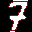

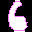

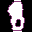

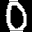

In [28]:
numbersDict = {
    "grid_1_1": [],
    "grid_1_2": [],
    "grid_1_3": [],
    "grid_1_4": [],
    "grid_1_5": [],
    "grid_1_6": [],
    "grid_1_7": [],
    "grid_1_8": [],
    "grid_2_1": [],
    "grid_2_2": [],
    "grid_2_3": [],
    "grid_2_4": [],    
    "grid_2_5": [],
    "grid_2_6": [],
    "grid_2_7": [],
    "grid_2_8": [],
    "grid_3_1": [],
    "grid_3_2": [],
    "grid_3_3": [],
    "grid_3_4": [],
    "grid_3_5": [],
    "grid_3_6": [],
    "grid_3_7": [],
    "grid_3_8": [],
    "grid_4_1": [],
    "grid_4_2": [],
    "grid_4_3": [],
    "grid_4_4": [],
    "grid_4_5": [],
    "grid_4_6": [],
    "grid_4_7": [],
    "grid_4_8": [],
    "grid_5_1": [],
    "grid_5_2": [],
    "grid_5_3": [],
    "grid_5_4": [],
    "grid_5_5": [],
    "grid_5_6": [],
    "grid_5_7": [],
    "grid_5_8": [],
    "grid_6_1": [],
    "grid_6_2": [],
    "grid_6_3": [],
    "grid_6_4": [],    
    "grid_6_5": [],
    "grid_6_6": [],
    "grid_6_7": [],
    "grid_6_8": [],
    "grid_7_1": [],
    "grid_7_2": [],
    "grid_7_3": [],
    "grid_7_4": [],
    "grid_7_5": [],
    "grid_7_6": [],
    "grid_7_7": [],
    "grid_7_8": [],
    "grid_8_1": [],
    "grid_8_2": [],
    "grid_8_3": [],
    "grid_8_4": [],
    "grid_8_5": [],
    "grid_8_6": [],
    "grid_8_7": [],
    "grid_8_8": [],
    "blob_area" : [],
    "blob_centroid_x" : [],
    "blob_centroid_y" : [],
    "blob_angle" : [],
    "blob_height": [],
    "blob_width": [],
#     "blob_amount_contours": [],
    "number_of_holes":[],
    "centroid_is_empty": [],
    "centroid_top_is_empty":[],
    "centroid_bottom_is_empty":[]
}
    
for number in numbers:
    image = number[0]
    invertedImage = number[1]
    invertedBlobCount = len(invertedImage.findBlobs()) -1
    blob = getBlob(image)
    matrix = createMatrix(image)
    centroid = blob.centroid()
    split = splitImage(image, centroid[1], blob.height())
    image.save(disp)
    for y in range(8):
        for x in range(8):
            numbersDict["grid_" + str(y+1) + "_" + str(x +1)].append(matrix[y][x])

    numbersDict["blob_area"].append(blob.area())
    numbersDict["blob_centroid_x"].append(centroid[0])
    numbersDict["blob_centroid_y"].append(centroid[1])
    numbersDict["blob_angle"].append(blob.angle())
    numbersDict["blob_height"].append(blob.height())
    numbersDict["blob_width"].append(blob.width())
#     numbersDict["blob_amount_contours"].append(len(blob.contour()))
    numbersDict["number_of_holes"].append(invertedBlobCount)
    numbersDict["centroid_is_empty"].append(isCentroidPixelBlack(image, centroid))
    numbersDict["centroid_top_is_empty"].append(split[0])
    numbersDict["centroid_bottom_is_empty"].append(split[1])

df = pd.DataFrame(numbersDict)
df = df[[
        "grid_1_1",
        "grid_1_2",
        "grid_1_3",
        "grid_1_4",
        "grid_1_5",
        "grid_1_6",
        "grid_1_7",
        "grid_1_8",
        "grid_2_1",
        "grid_2_2",
        "grid_2_3",
        "grid_2_4",
        "grid_2_5",
        "grid_2_6",
        "grid_2_7",
        "grid_2_8",
        "grid_3_1",
        "grid_3_2",
        "grid_3_3",
        "grid_3_4",
        "grid_3_5",
        "grid_3_6",
        "grid_3_7",
        "grid_3_8",
        "grid_4_1",
        "grid_4_2",
        "grid_4_3",
        "grid_4_4",
        "grid_4_5",
        "grid_4_6",
        "grid_4_7",
        "grid_4_8",        
        "grid_5_1",
        "grid_5_2",
        "grid_5_3",
        "grid_5_4",
        "grid_5_5",
        "grid_5_6",
        "grid_5_7",
        "grid_5_8",
        "grid_6_1",
        "grid_6_2",
        "grid_6_3",
        "grid_6_4",
        "grid_6_5",
        "grid_6_6",
        "grid_6_7",
        "grid_6_8",
        "grid_7_1",
        "grid_7_2",
        "grid_7_3",
        "grid_7_4",
        "grid_7_5",
        "grid_7_6",
        "grid_7_7",
        "grid_7_8",
        "grid_8_1",
        "grid_8_2",
        "grid_8_3",
        "grid_8_4",
        "grid_8_5",
        "grid_8_6",
        "grid_8_7",
        "grid_8_8",
         "blob_area", 
         "blob_centroid_x", 
         "blob_centroid_y",
         "blob_angle",
         "blob_height",
         "blob_width",
#          "blob_amount_contours",
         "number_of_holes",
         "centroid_is_empty",
         "centroid_top_is_empty",
         "centroid_bottom_is_empty"]]

In [29]:
df.head()

,grid_1_1,grid_1_2,grid_1_3,grid_1_4,grid_1_5,grid_1_6,grid_1_7,grid_1_8,grid_2_1,grid_2_2,...,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_height,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty
0,0,0,4,14,16,16,16,0,0,0,...,248.5,17.586184,13.095909,90.000000,30,20,0,1,0,0
1,0,0,0,8,16,3,0,0,0,0,...,319.0,16.263323,18.274295,90.000000,30,20,0,0,0,0
2,0,0,0,12,16,6,0,0,0,0,...,355.5,16.224098,15.389123,83.659808,30,18,1,0,0,1
3,0,0,13,16,11,0,0,0,0,3,...,493.0,15.550034,16.197431,90.000000,30,22,1,1,1,0


# Drop columns

In [30]:
from sklearn import preprocessing

# columnsToDrop = []
# normalizeColumns = []

# for column in df:
#     if(df[column].mean() < 5.0) & ('grid' in column):
#         df = df.drop(column, axis=1)
#     elif 'label' not in column:
#         normalizeColumns.append(column)
df = df.drop(['grid_1_1', 'grid_1_2', 'grid_1_7', 'grid_1_8', 'grid_2_1', 'grid_2_2', 'grid_2_7', 'grid_2_8', 
              'grid_3_1', 'grid_3_2', 'grid_3_7', 'grid_3_8', 'grid_4_1', 'grid_4_2', 'grid_4_7', 'grid_4_8', 
              'grid_5_1', 'grid_5_2', 'grid_5_7', 'grid_5_8', 'grid_6_1', 'grid_6_2', 'grid_6_7', 'grid_6_8',
              'grid_7_1', 'grid_7_2', 'grid_7_7', 'grid_7_8', 'grid_8_1', 'grid_8_2', 'grid_8_7', 'grid_8_8'], axis=1)        
df = df.drop(['blob_height'], axis=1)


# normalizeColumns.remove('blob_height')
min_max_scaler = preprocessing.MinMaxScaler()

df_normalized = df.copy()
columns = ['grid_1_3', 'grid_1_4', 'grid_1_5', 'grid_1_6', 'grid_2_3', 
           'grid_2_4', 'grid_2_5', 'grid_2_6', 'grid_3_3', 'grid_3_4', 
           'grid_3_5', 'grid_3_6', 'grid_4_3', 'grid_4_4', 'grid_4_5', 
           'grid_4_6', 'grid_5_3', 'grid_5_4', 'grid_5_5', 'grid_5_6', 
           'grid_6_3', 'grid_6_4', 'grid_6_5', 'grid_6_6', 'grid_7_3', 
           'grid_7_4', 'grid_7_5', 'grid_7_6', 'grid_8_3', 'grid_8_4', 
           'grid_8_5', 'grid_8_6', 'blob_area', 'blob_centroid_x', 
           'blob_centroid_y', 'blob_angle', 'blob_width', 'number_of_holes', 'centroid_is_empty', 
           'centroid_top_is_empty', 'centroid_bottom_is_empty']

scaled = min_max_scaler.fit_transform(df_normalized[columns])
df_normalized[columns] = pd.DataFrame(scaled, columns= columns)
df_normalized.head() 
        

,grid_1_3,grid_1_4,grid_1_5,grid_1_6,grid_2_3,grid_2_4,grid_2_5,grid_2_6,grid_3_3,grid_3_4,...,grid_8_6,blob_area,blob_centroid_x,blob_centroid_y,blob_angle,blob_width,number_of_holes,centroid_is_empty,centroid_top_is_empty,centroid_bottom_is_empty
0,0.307692,0.75,1,1.0000,0.785714,0.625,0.00,1.0,0.000,0,...,0.0000,0.000000,1.000000,0.000000,1,0.5,0,1,0,0
1,0.000000,0.00,1,0.1875,0.000000,0.875,0.75,0.0,0.625,1,...,1.0000,0.288344,0.350313,1.000000,1,0.5,0,0,0,0
2,0.000000,0.50,1,0.3750,0.642857,1.000,1.00,0.8,1.000,1,...,0.5625,0.437628,0.331048,0.442843,0,0.0,1,0,0,1
3,1.000000,1.00,0,0.0000,1.000000,0.000,0.75,0.5,0.875,0,...,0.8750,1.000000,0.000000,0.598936,1,1.0,1,1,1,0


In [31]:
print df_normalized

   grid_1_3  grid_1_4  grid_1_5  grid_1_6  grid_2_3  grid_2_4  grid_2_5  \
0  0.307692      0.75         1    1.0000  0.785714     0.625      0.00   
1  0.000000      0.00         1    0.1875  0.000000     0.875      0.75   
2  0.000000      0.50         1    0.3750  0.642857     1.000      1.00   
3  1.000000      1.00         0    0.0000  1.000000     0.000      0.75   

   grid_2_6  grid_3_3  grid_3_4            ...             grid_8_6  \
0       1.0     0.000         0            ...               0.0000   
1       0.0     0.625         1            ...               1.0000   
2       0.8     1.000         1            ...               0.5625   
3       0.5     0.875         0            ...               0.8750   

   blob_area  blob_centroid_x  blob_centroid_y  blob_angle  blob_width  \
0   0.000000         1.000000         0.000000           1         0.5   
1   0.288344         0.350313         1.000000           1         0.5   
2   0.437628         0.331048         0.442843

In [32]:
from sklearn.externals import joblib
clf = joblib.load('svcModel.joblib')

# labels = [[7,8,5,0]]

# clf.score(labels, df_normalized)
clf.predict(df_normalized)

array([7, 6, 8, 0])